In [6]:
from data_v1 import get_dataloader
import torch.nn.functional as F

In [7]:
train_dataloader, valid_dataloader = get_dataloader()

In [10]:
from effunet import EffUNet
model = EffUNet(model="b4", 
                out_channels=3, 
               freeze_backbone=True,
               pretrained=True,
               device="cpu",
               )

Loaded pretrained weights for efficientnet-b4


torch.Size([8, 3, 448, 597]) torch.Size([8, 3, 448, 597])
torch.Size([8, 3, 448, 448])


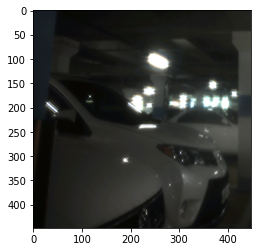

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


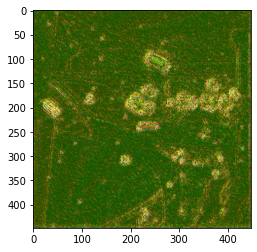

In [15]:
import matplotlib.pyplot as plt

for img, label in train_dataloader:
    print(img.size(), label.size())
    tmp = F.interpolate(img, size=448)
    pred = model(tmp)
    print(pred.size())
    
    plt.imshow(tmp[0].permute(1, 2, 0))
    plt.show()
    plt.imshow(pred[0].permute(1, 2, 0).detach().numpy())
    plt.show()
    break